In [ ]:
# !pip install langchain langchain_community langgraph langchain_groq

In [ ]:
# !pip install langsmith wikipedia

In [ ]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END
from langchain_groq import ChatGroq
import requests
from langchain_core.messages import SystemMessage,HumanMessage
from langgraph.graph import MessagesState

from langgraph.prebuilt import ToolNode,tools_condition
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages

In [ ]:
class State(TypedDict):
  messages: Annotated[list,add_messages]

In [ ]:
# !pip install -U duckduckgo-search

In [ ]:
from ddgs.wrappers import DDGS
import re

def search_duckduckgo(query:str):
  """Searches DuckDuckGo for the given query and attempts to extract a year."""
  search=DDGS()
  result = search.text(query)
  # Attempt to extract a year from the result
  match = re.search(r'\b(\d{4})\b', result)
  if match:
    return match.group(1)
  return result

resulut=search_duckduckgo("what is langchain")
print(resulut)

/usr/local/lib/python3.11/dist-packages/langchain_community/utilities/duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:


May 22, 2025 · What is LangChain? LangChain is an open-source framework designed to help developers build applications that leverage the power of large language models (LLMs) such as GPT, LLaMA, and others. Jan 2, 2025 · LangChain is an open source model for building LLM-powered apps. Discover its features and benefits, and … Feb 18, 2025 · Learn about LangChain, its key features, and how it benefits developers in building powerful applications with … Jul 6, 2025 · We’ll also compare LangChain to other similar tools (such as LlamaIndex and Haystack) and finish with a simple Python demo. Key Takeaways LangChain is a modular, open-source Python framework to simplify the building of advanced LLM applications. It provides standardized interfaces for models, embeddings, vector stores, tools, and memory. May 22, 2025 · LangChain is an open-source framework that simplifies building applications powered by Large Language Models (LLMs). Supporting both Python and JavaScript, LangChain enables y

In [ ]:
def multiply(a:int,b:int)->int:
  """Multiplies two integers."""
  return a* b

def add(a:int,b:int)->int:
  """Adds two integers."""
  return a+b

In [ ]:
from google.colab import userdata
import os
os.environ["groq_Api"]=userdata.get("groq_Api")


In [ ]:
llm=ChatGroq(groq_api_key=os.environ["groq_Api"], model_name="llama3-8b-8192")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7a6b4af5cfd0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7a6b4a5e1e90>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [ ]:
llm.invoke('hello').content

"Hello! It's nice to meet you. Is there something I can help you with, or would you like to chat?"

In [ ]:
tools=[search_duckduckgo,add,multiply]
llm_with_tools=llm.bind_tools(tools)

In [ ]:
def chatbot(state:State):
  return{"messages":[llm_with_tools.invoke(state['messages'])]}

In [ ]:
graph_builder=StateGraph(State)

graph_builder.add_node("assistant",chatbot)
graph_builder.add_node("tools",ToolNode(tools))

graph_builder.add_edge(START,"assistant")
graph_builder.add_conditional_edges("assistant",tools_condition)
graph_builder.add_edge("tools","assistant")


react_graph=graph_builder.compile()

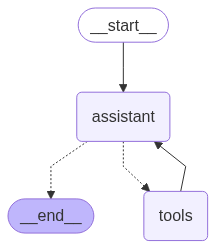

In [ ]:
display(Image(react_graph.get_graph().draw_mermaid_png()))

In [ ]:
response=react_graph.invoke({"messages":[SystemMessage(content="You are a helpful assistant that can search for information and perform calculations using the provided tools."),HumanMessage(content="what is the year of Indian Independence? After finding the year, multiply it by 2 and then add 5 to the result.")]})
print(response["messages"])

/usr/local/lib/python3.11/dist-packages/langchain_community/utilities/duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:
sys:1: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7a6b4a36c3d0>
/usr/local/lib/python3.11/dist-packages/langchain_community/utilities/duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:
sys:1: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7a6b4a36c830>


[SystemMessage(content='You are a helpful assistant that can search for information and perform calculations using the provided tools.', additional_kwargs={}, response_metadata={}, id='03e935e5-051e-4870-81ad-eba2b8ca7cf3'), HumanMessage(content='what is the year of Indian Independence? After finding the year, multiply it by 2 and then add 5 to the result.', additional_kwargs={}, response_metadata={}, id='4b719521-1662-454c-883d-924d43198d24'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'nqqb6nkkb', 'function': {'arguments': '{"query":"Year of Indian Independence"}', 'name': 'search_duckduckgo'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 120, 'prompt_tokens': 1111, 'total_tokens': 1231, 'completion_time': 0.122378437, 'prompt_time': 0.124813035, 'queue_time': 0.057323372, 'total_time': 0.247191472}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_c0b3855449', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', '

In [ ]:
for m in response['messages']:
  m.pretty_print()

================================ System Message ================================

You are a helpful assistant that can search for information and perform calculations using the provided tools.
================================ Human Message =================================

what is the year of Indian Independence? After finding the year, multiply it by 2 and then add 5 to the result.
================================== Ai Message ==================================
Tool Calls:
  search_duckduckgo (nqqb6nkkb)
 Call ID: nqqb6nkkb
  Args:
    query: Year of Indian Independence
================================= Tool Message =================================
Name: search_duckduckgo

No good DuckDuckGo Search Result was found
================================== Ai Message ==================================
Tool Calls:
  search_duckduckgo (q8s8geaba)
 Call ID: q8s8geaba
  Args:
    query: Year of Indian Independence
================================= Tool Message =================================